# Análise exploratória de 30 arquivos parquet do arquivo ZIP '06120089' 

## Importação bibliotecas

In [1]:
!pip install pyarrow
!pip install fastparquet
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy.stats
!pip install dask dask[dataframe]
!pip install tslearn
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import os
import dask.dataframe as dd

## Carregamento de 30 arquivos parquet e concantenação dos arquivos

In [3]:
import os
import dask.dataframe as dd

def concatenate_and_count_rows_in_parquet_files(file_path, filtered_cols):
    total_rows = 0
    list_of_dfs = []  # Lista para armazenar os DataFrames lidos
    
    # Lista de arquivos Parquet no diretório especificado
    parquet_files = [file for file in os.listdir(file_path) if file.endswith('.parquet')]
    
    # Selecionando apenas os primeiros 30 arquivos parquet, caso existam
    selected_files = parquet_files[:30]
    
    # Loop para ler cada arquivo Parquet, contar as linhas e armazenar o DataFrame na lista
    for file_name in selected_files:
        full_path = os.path.join(file_path, file_name)
        df = dd.read_parquet(full_path, columns=filtered_cols)
        total_rows += len(df)
        list_of_dfs.append(df)
        print(f"Arquivo {file_name} tem {len(df)} linhas.")
    
    # Concatenar todos os Dask DataFrames em um único Dask DataFrame
    concatenated_df = dd.concat(list_of_dfs, interleave_partitions=True)
    
    return concatenated_df, total_rows

# Uso da função
file_path = "primeiro_arquivo_zip/"
filtered_cols = ['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1', 'phaseOfFlight-1',
                 'message0418DAA-1','message0422DAA-1','amscHprsovDrivF-1a', 'amscHprsovDrivF-1b',
                 'amscHprsovDrivF-2b', 'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b',
                 'amscPrsovDrivF-2b', 'basBleedLowPressF-1a', 'basBleedLowPressF-2b',
                 'basBleedLowTempF-1a', 'basBleedLowTempF-2b', 'basBleedOverPressF-1a',
                 'basBleedOverPressF-2b', 'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
                 'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
                 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
                 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
                 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
                 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
                 'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a', 'bleedOnStatus-1b',
                 'bleedOnStatus-2b', 'bleedOverpressCas-2a', 'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a',
                 'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
                 'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a',
                 'timeHours-1', 'timeMinutes-1', 'timeSeconds-1']  # Colunas adicionadas

resulting_df, total_rows = concatenate_and_count_rows_in_parquet_files(file_path, filtered_cols)
print(f"O número total de linhas em todos os arquivos é: {total_rows}")

Arquivo TCRF_ARCHIVE_06120089_20221212212501.parquet tem 6002 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212502.parquet tem 6081 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212504.parquet tem 10301 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212505.parquet tem 41361 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212506.parquet tem 6961 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212507.parquet tem 17721 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212508.parquet tem 45721 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212509.parquet tem 21781 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212510.parquet tem 46661 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212511.parquet tem 28741 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212512.parquet tem 13981 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212513.parquet tem 60010 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212514.parquet tem 7741 linhas.
Arquivo TCRF_ARCHIVE_06120089_20221212212515.parquet tem 8081 linhas.
Arquivo TCR

In [4]:
resulting_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 55 entries, recording_time to timeSeconds-1
dtypes: float64(54), int64(1)

In [34]:
resulting_df.describe()

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,basBleedLowPressF-1a,basBleedLowPressF-2b,basBleedLowTempF-1a,basBleedLowTempF-2b,basBleedOverPressF-1a,basBleedOverPressF-2b,basBleedOverTempF-1a,basBleedOverTempF-2b,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,bleedFavTmFbk-1a,bleedFavTmFbk-1b,bleedFavTmFbk-2b,bleedHprsovCmdStatus-1a,bleedHprsovCmdStatus-1b,bleedHprsovCmdStatus-2a,bleedHprsovCmdStatus-2b,bleedHprsovOpPosStatus-1a,bleedHprsovOpPosStatus-1b,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,timeHours-1,timeMinutes-1,timeSeconds-1
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [5]:
resulting_df.columns

Index(['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1',
       'phaseOfFlight-1', 'message0418DAA-1', 'message0422DAA-1',
       'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
       'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
       'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a',
       'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
       'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b',
       'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b',
       'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
       'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b',
       'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b',
       'bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a',
       'bleedMonPress-2b', 'bleedOnSta

In [6]:
resulting_df.describe()

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,basBleedLowPressF-1a,basBleedLowPressF-2b,basBleedLowTempF-1a,basBleedLowTempF-2b,basBleedOverPressF-1a,basBleedOverPressF-2b,basBleedOverTempF-1a,basBleedOverTempF-2b,bleedFavTmCmd-1a,bleedFavTmCmd-1b,bleedFavTmCmd-2a,bleedFavTmCmd-2b,bleedFavTmFbk-1a,bleedFavTmFbk-1b,bleedFavTmFbk-2b,bleedHprsovCmdStatus-1a,bleedHprsovCmdStatus-1b,bleedHprsovCmdStatus-2a,bleedHprsovCmdStatus-2b,bleedHprsovOpPosStatus-1a,bleedHprsovOpPosStatus-1b,bleedHprsovOpPosStatus-2a,bleedHprsovOpPosStatus-2b,bleedMonPress-1a,bleedMonPress-1b,bleedMonPress-2a,bleedMonPress-2b,bleedOnStatus-1a,bleedOnStatus-1b,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,timeHours-1,timeMinutes-1,timeSeconds-1
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Remoção de linhas duplicadas com base todas as colunas exceto a 'record_time' 

In [7]:
def remove_duplicates_except_record_time(dask_df):
    """
    Remove linhas duplicadas com base em todas as colunas, exceto 'record_time'.

    Parâmetros:
    - dask_df: DataFrame Dask de entrada.

    Retorna:
    - DataFrame Dask com linhas duplicadas removidas.
    """
    
    # Lista de colunas a serem consideradas ao identificar duplicatas
    columns_to_consider = [col for col in dask_df.columns if col != 'record_time']
    
    # Método drop_duplicates do Dask para remover duplicatas com base nas colunas especificadas
    #Mantém o primeiro valor duplicado por default
    unique_df = dask_df.drop_duplicates(subset=columns_to_consider)
    
    return unique_df

# Uso da função
unique_df = remove_duplicates_except_record_time(resulting_df)

In [7]:
# Contar o número de linhas em 'unique_df' (depois da remoção de duplicatas)
after_row_count = len(unique_df)

# Imprimir os resultado
print(f"Número de linhas depois da remoção de duplicatas: {after_row_count}")

Número de linhas depois da remoção de duplicatas: 1032654


## Criação da coluna datetime com as colunas de dia, mês, ano e horário

In [97]:
#Transformando o df do dask para um df do pandas
pandas_df = unique_df.compute()

In [98]:
df_with_datetime = pandas_df.copy()

# Criar as colunas 'date_string' e 'time_string'
# Função .fillna() para substituir NaNs temporariamente para evitar erros ao converter para int e string
df_with_datetime['date_string'] = df_with_datetime['dateYear-1'].fillna(0).astype(int).astype(str) + '-' + \
                                 df_with_datetime['dateMonth-1'].fillna(0).astype(int).astype(str).str.zfill(2) + '-' + \
                                 df_with_datetime['dateDay-1'].fillna(0).astype(int).astype(str).str.zfill(2)

df_with_datetime['time_string'] = df_with_datetime['timeHours-1'].fillna(0).astype(int).astype(str).str.zfill(2) + ':' + \
                                 df_with_datetime['timeMinutes-1'].fillna(0).astype(int).astype(str).str.zfill(2) + ':' + \
                                 df_with_datetime['timeSeconds-1'].fillna(0).astype(int).astype(str).str.zfill(2)

# Criar 'datetime'
# Se qualquer valor nas colunas originais de data ou hora for NaN, substitua a entrada 'datetime' correspondente por NaN
mask = df_with_datetime[['dateYear-1', 'dateMonth-1', 'dateDay-1', 'timeHours-1', 'timeMinutes-1', 'timeSeconds-1']].isnull().any(axis=1)
df_with_datetime['datetime'] = pd.to_datetime(df_with_datetime['date_string'] + ' ' + df_with_datetime['time_string'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_with_datetime.loc[mask, 'datetime'] = pd.NaT  # Define as NaT (Not a Timestamp) onde temos valores NaN nas colunas originais

# Verificando as primeiras linhas para conferir se as modificações foram bem-sucedidas
print(df_with_datetime[['date_string', 'time_string', 'datetime']].head())

  date_string time_string            datetime
0     0-00-00    00:00:00                 NaT
1     0-00-00    00:00:00                 NaT
2     0-00-00    00:00:00                 NaT
3  2022-12-06    16:18:53 2022-12-06 16:18:53
4     0-00-00    00:00:00                 NaT


In [39]:
print("Original number of rows:", len(pandas_df))
print("Number of rows after filtering:", len(df_with_datetime))

Original number of rows: 1032654
Number of rows after filtering: 1032654


In [40]:
df_with_datetime.columns

Index(['recording_time', 'dateDay-1', 'dateMonth-1', 'dateYear-1',
       'phaseOfFlight-1', 'message0418DAA-1', 'message0422DAA-1',
       'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
       'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
       'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a',
       'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
       'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b',
       'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b',
       'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
       'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b',
       'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b',
       'bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a',
       'bleedMonPress-2b', 'bleedOnSta

In [41]:
df_with_datetime.describe()

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,...,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,timeHours-1,timeMinutes-1,timeSeconds-1,datetime
count,1.032654e+06,94241.000000,94241.000000,94241.000000,423480.000000,94241.0,94241.000000,471129.0,471129.0,471129.000000,...,471129.000000,471129.000000,471129.000000,423480.000000,423480.000000,471129.000000,94241.000000,94241.000000,94241.000000,94241
mean,3.933123e+06,12.210492,7.784234,2022.383251,0.801939,0.0,0.053215,0.0,0.0,0.000025,...,0.483109,-0.372659,-0.633589,0.160298,0.133255,35.571204,13.916905,29.810751,29.497172,2022-12-24 16:36:46.215373568
min,0.000000e+00,2.000000,1.000000,2022.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,-0.250000,-128.000000,-128.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,2022-12-02 12:23:20
25%,1.388850e+06,8.000000,1.000000,2022.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.343750,0.312500,0.312500,0.000000,0.000000,0.625000,6.000000,15.000000,14.000000,2022-12-12 18:42:27
50%,3.234650e+06,12.000000,12.000000,2022.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.468750,0.406250,0.406250,0.000000,0.000000,0.875000,18.000000,30.000000,30.000000,2022-12-23 16:38:56
75%,6.192250e+06,17.000000,12.000000,2023.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.718750,0.687500,0.687500,0.000000,0.000000,2.125000,20.000000,45.000000,44.000000,2023-01-03 23:01:05
max,1.095300e+07,30.000000,12.000000,2023.000000,2.000000,0.0,7.000000,0.0,0.0,1.000000,...,4.187500,4.687500,4.687500,1.000000,1.000000,340.375000,23.000000,59.000000,59.000000,2023-01-15 07:57:20
std,2.978780e+06,6.796529,5.347995,0.486181,0.791990,0.0,0.606611,0.0,0.0,0.005047,...,0.369499,10.342640,11.836073,0.366883,0.339851,67.594540,7.596559,17.399212,17.319458,NaN


In [99]:
# Lista de colunas para serem removidas
cols_to_remove = ['dateDay-1', 'dateMonth-1', 'dateYear-1', 'timeHours-1', 'timeMinutes-1', 'timeSeconds-1', 'date_string', 'time_string']

# Removendo as colunas e atribuindo o resultado a um novo DataFrame
analysis_df = df_with_datetime.drop(columns=cols_to_remove)

# Verificando as primeiras linhas do novo DataFrame para conferir se as colunas foram removidas corretamente
print(analysis_df.head())

   recording_time  phaseOfFlight-1  message0418DAA-1  message0422DAA-1   
0               0              0.0               NaN               NaN  \
1              50              NaN               NaN               NaN   
2             100              0.0               NaN               NaN   
3             150              NaN               0.0               0.0   
4             200              0.0               NaN               NaN   

   amscHprsovDrivF-1a  amscHprsovDrivF-1b  amscHprsovDrivF-2b   
0                 NaN                 NaN                 NaN  \
1                 0.0                 0.0                 0.0   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   amscPrsovDrivF-1a  amscPrsovDrivF-1b  amscPrsovDrivF-2b  ...   
0                NaN                NaN                NaN  ...  \
1                0.0          

## Matriz de correlação

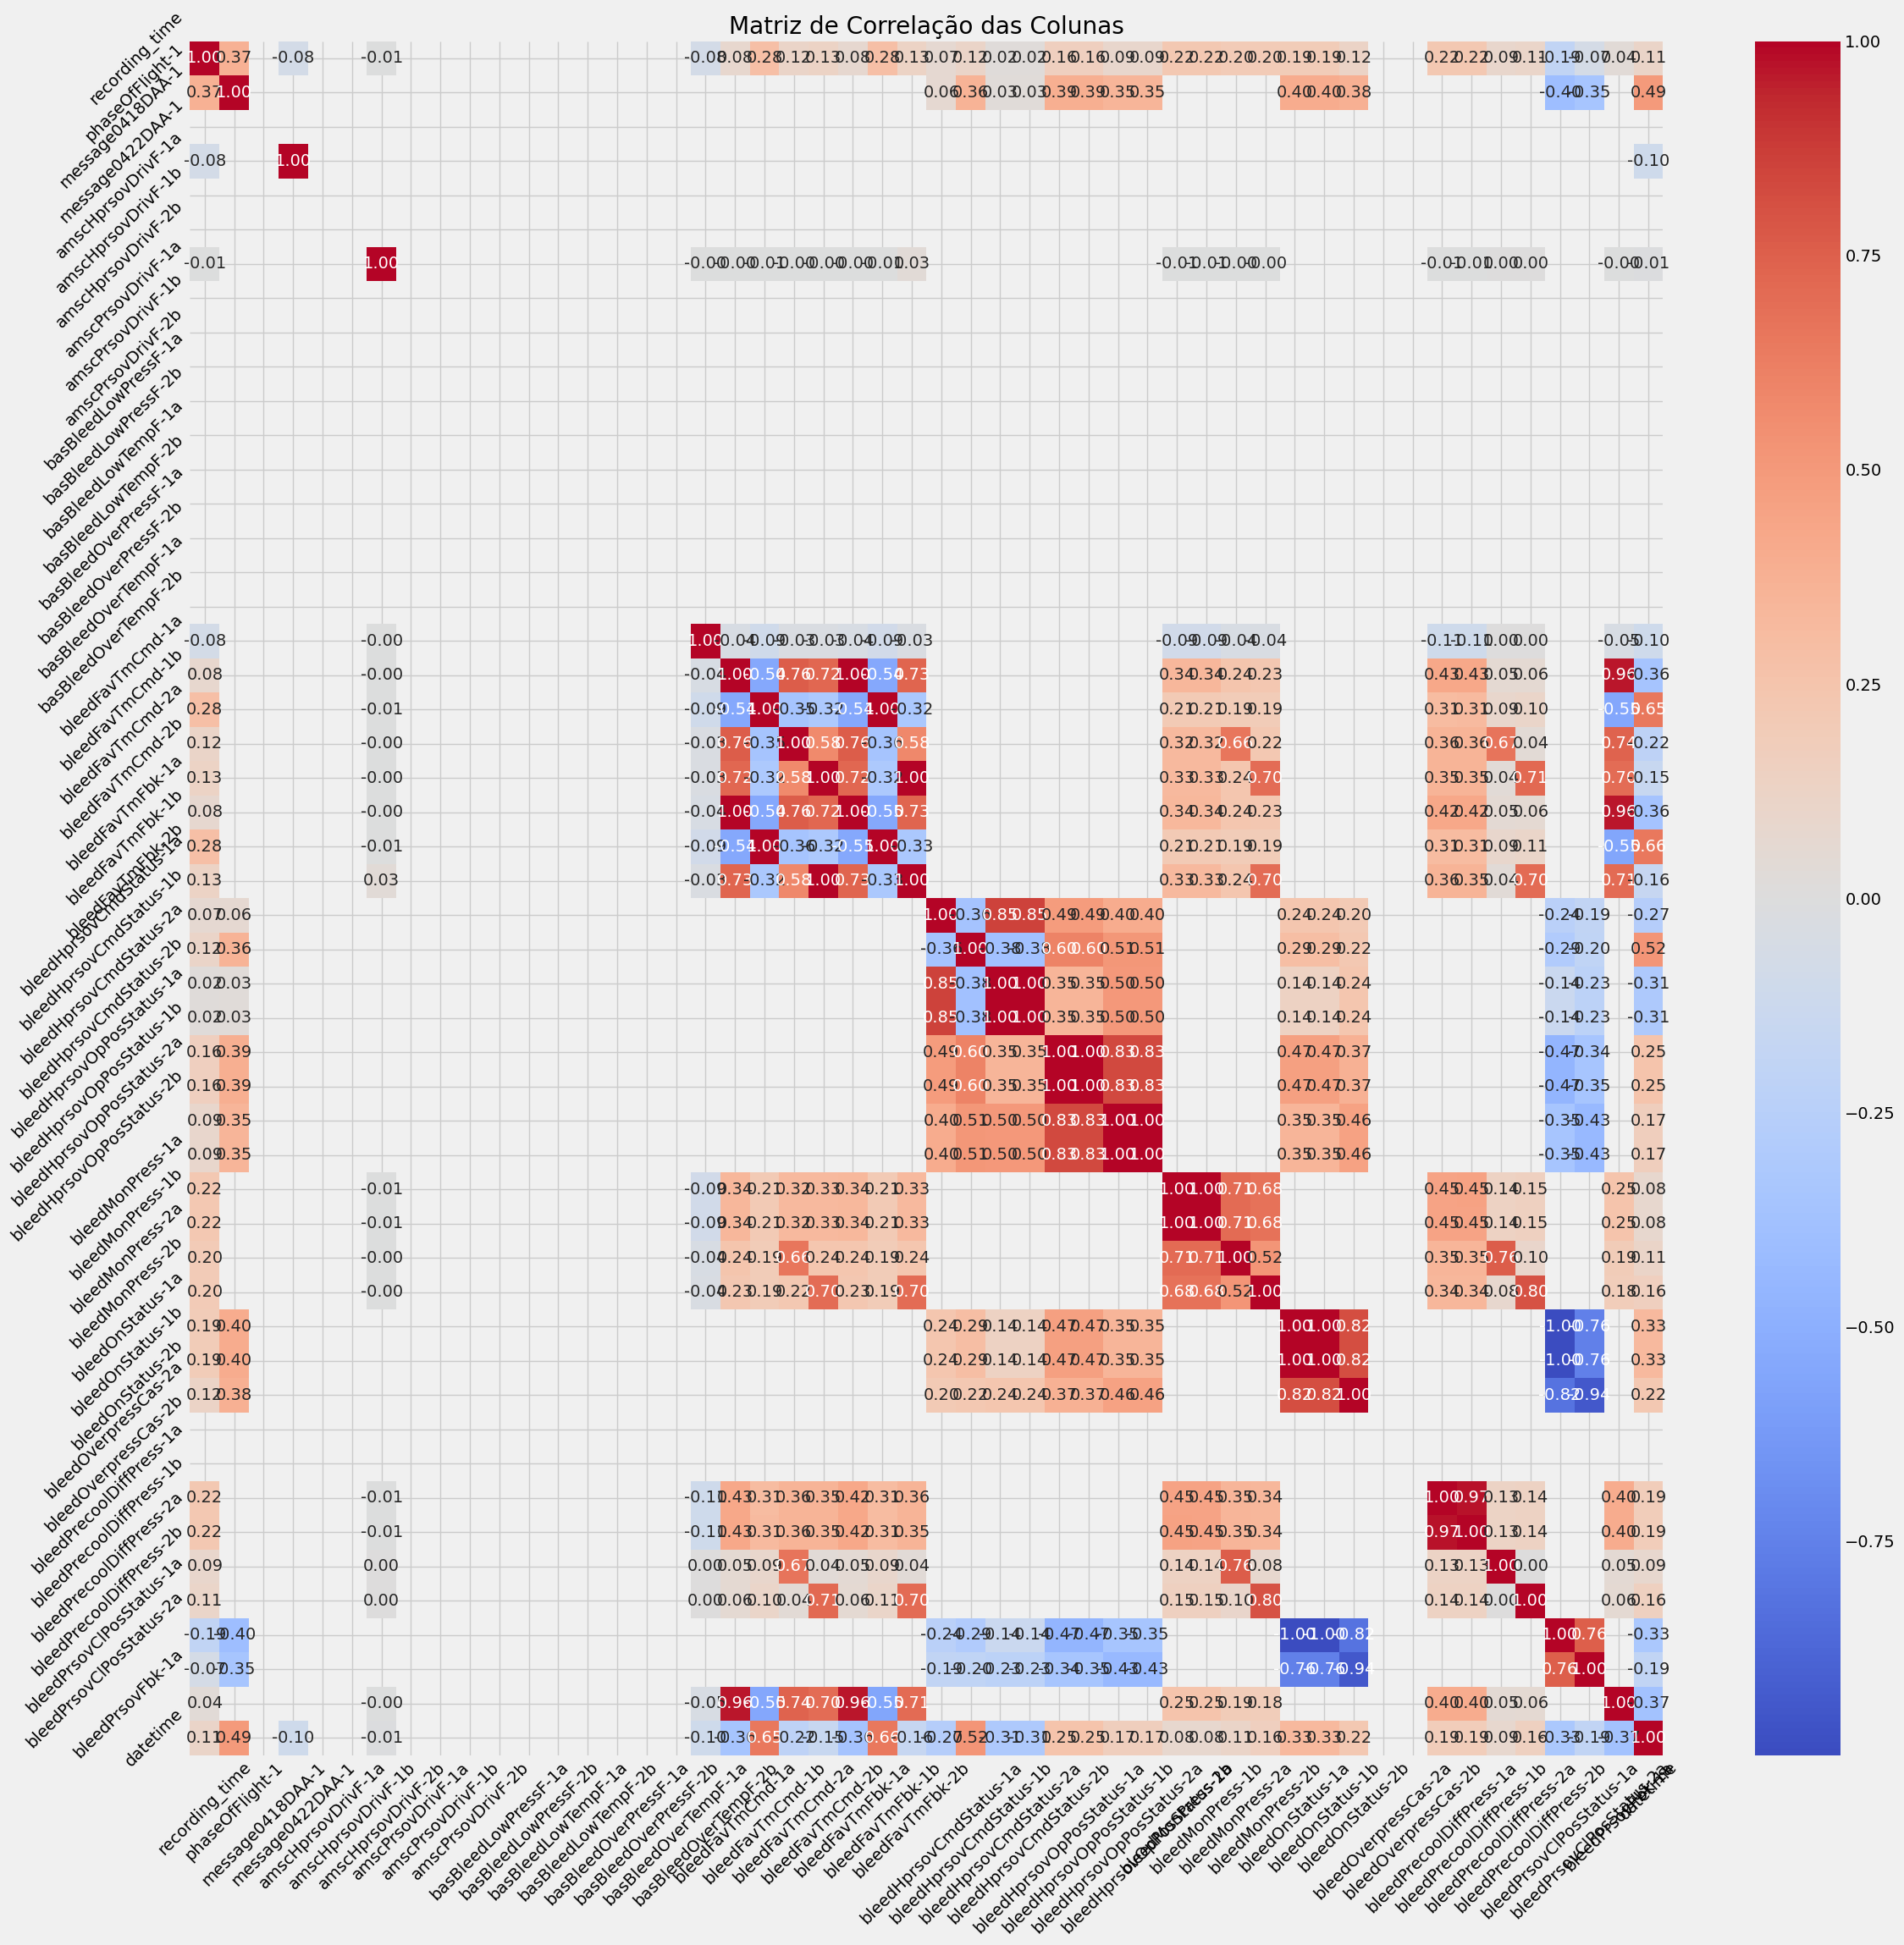

In [143]:
import seaborn as sn
import matplotlib.pyplot as plt

selected_columns = ['recording_time', 'phaseOfFlight-1', 'message0418DAA-1', 'message0422DAA-1',
       'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
       'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
       'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a',
       'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
       'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b',
       'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b',
       'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
       'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b',
       'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b',
       'bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a',
       'bleedMonPress-2b', 'bleedOnStatus-1a', 'bleedOnStatus-1b',
       'bleedOnStatus-2b', 'bleedOverpressCas-2a', 'bleedOverpressCas-2b',
       'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b',
       'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
       'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a',
       'bleedPrsovFbk-1a', 'datetime'
]

# Ajustando a visualização para essas colunas
plt.figure(figsize=(25, 25))
corr_matrix_selected = analysis_df[selected_columns].corr()
sn.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlação das Colunas")
plt.savefig("correlation_matrix_antes.png", dpi=300, bbox_inches='tight')
plt.show()

## Estatística descritiva

In [50]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032654 entries, 0 to 107300
Data columns (total 50 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   recording_time             1032654 non-null  int64         
 1   phaseOfFlight-1            423480 non-null   float64       
 2   message0418DAA-1           94241 non-null    float64       
 3   message0422DAA-1           94241 non-null    float64       
 4   amscHprsovDrivF-1a         471129 non-null   float64       
 5   amscHprsovDrivF-1b         471129 non-null   float64       
 6   amscHprsovDrivF-2b         471129 non-null   float64       
 7   amscPrsovDrivF-1a          471129 non-null   float64       
 8   amscPrsovDrivF-1b          471129 non-null   float64       
 9   amscPrsovDrivF-2b          471129 non-null   float64       
 10  basBleedLowPressF-1a       471129 non-null   float64       
 11  basBleedLowPressF-2b       471129 non-null 

In [51]:
analysis_df['message0418DAA-1'].value_counts()

message0418DAA-1
0.0    94241
Name: count, dtype: int64

In [52]:
analysis_df['message0422DAA-1'].value_counts()

message0422DAA-1
0.0    93520
7.0      705
5.0       16
Name: count, dtype: int64

In [53]:
analysis_df.isnull().sum()

recording_time                    0
phaseOfFlight-1              609174
message0418DAA-1             938413
message0422DAA-1             938413
amscHprsovDrivF-1a           561525
amscHprsovDrivF-1b           561525
amscHprsovDrivF-2b           561525
amscPrsovDrivF-1a            561525
amscPrsovDrivF-1b            561525
amscPrsovDrivF-2b            561525
basBleedLowPressF-1a         561525
basBleedLowPressF-2b         561525
basBleedLowTempF-1a          561525
basBleedLowTempF-2b          561525
basBleedOverPressF-1a        561525
basBleedOverPressF-2b        561525
basBleedOverTempF-1a         561525
basBleedOverTempF-2b         561525
bleedFavTmCmd-1a             561525
bleedFavTmCmd-1b             561525
bleedFavTmCmd-2a             561525
bleedFavTmCmd-2b             561525
bleedFavTmFbk-1a             561525
bleedFavTmFbk-1b             561525
bleedFavTmFbk-2b             561525
bleedHprsovCmdStatus-1a      609174
bleedHprsovCmdStatus-1b      609174
bleedHprsovCmdStatus-2a     

In [54]:
analysis_df.describe()

,recording_time,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,amscPrsovDrivF-1a,amscPrsovDrivF-1b,amscPrsovDrivF-2b,...,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a,datetime
count,1.032654e+06,423480.000000,94241.0,94241.000000,471129.0,471129.0,471129.000000,471129.0,471129.0,471129.0,...,471129.0,471129.0,471129.000000,471129.000000,471129.000000,471129.000000,423480.000000,423480.000000,471129.000000,94241
mean,3.933123e+06,0.801939,0.0,0.053215,0.0,0.0,0.000025,0.0,0.0,0.0,...,0.0,0.0,0.482539,0.483109,-0.372659,-0.633589,0.160298,0.133255,35.571204,2022-12-24 16:36:46.215373568
min,0.000000e+00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,-0.250000,-0.250000,-128.000000,-128.000000,0.000000,0.000000,0.250000,2022-12-02 12:23:20
25%,1.388850e+06,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.343750,0.343750,0.312500,0.312500,0.000000,0.000000,0.625000,2022-12-12 18:42:27
50%,3.234650e+06,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.468750,0.468750,0.406250,0.406250,0.000000,0.000000,0.875000,2022-12-23 16:38:56
75%,6.192250e+06,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.718750,0.718750,0.687500,0.687500,0.000000,0.000000,2.125000,2023-01-03 23:01:05
max,1.095300e+07,2.000000,0.0,7.000000,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,3.875000,4.187500,4.687500,4.687500,1.000000,1.000000,340.375000,2023-01-15 07:57:20
std,2.978780e+06,0.791990,0.0,0.606611,0.0,0.0,0.005047,0.0,0.0,0.0,...,0.0,0.0,0.369722,0.369499,10.342640,11.836073,0.366883,0.339851,67.594540,NaN


## Resumo dos dados com gráficos

### Box plot para colunas dos sensores

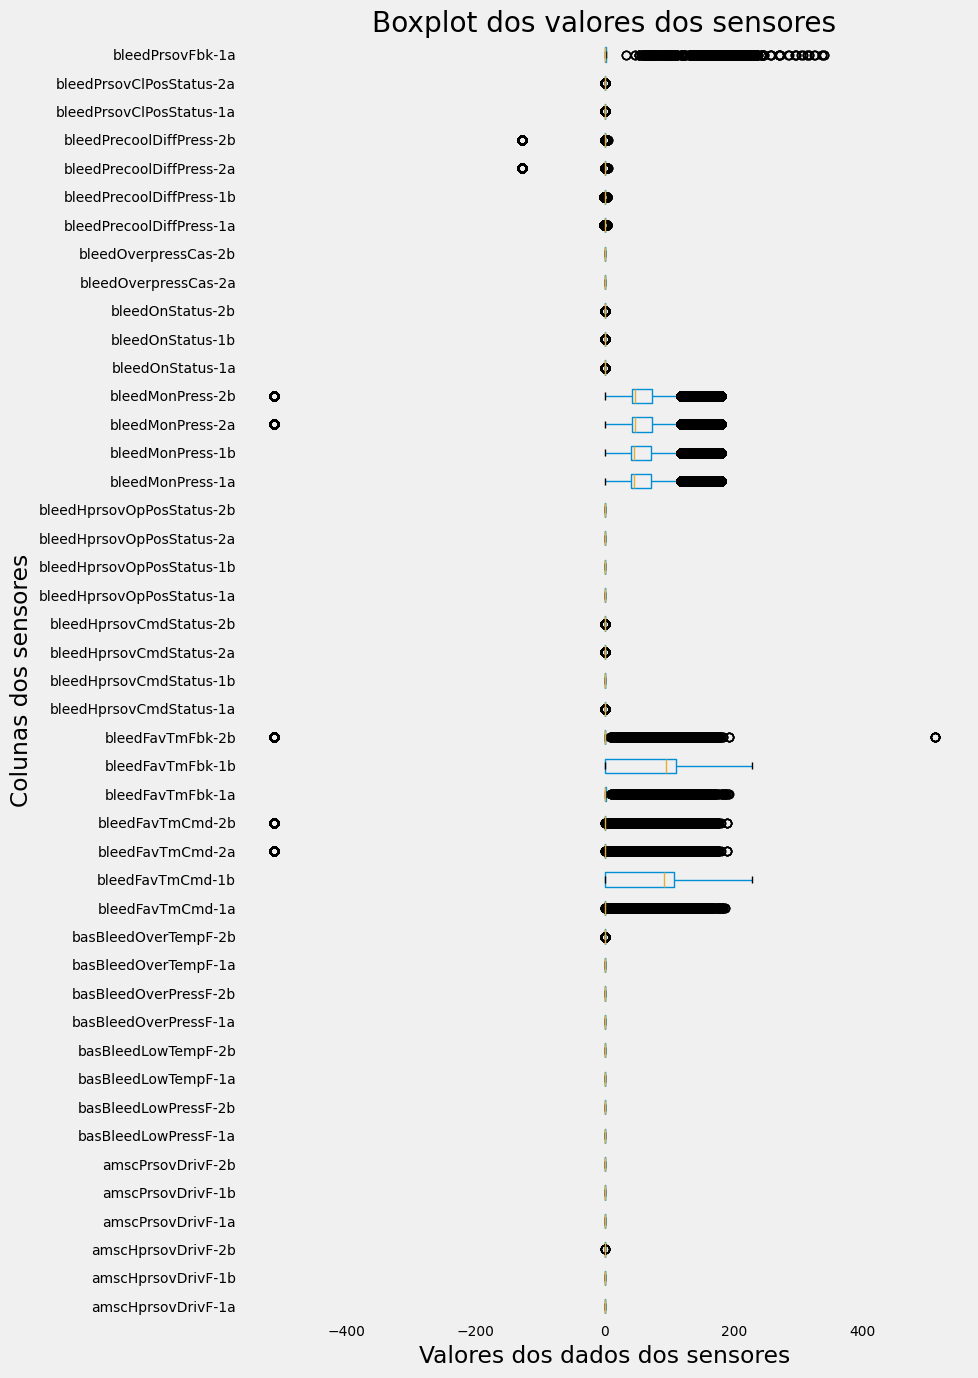

In [144]:
# Lista de colunas dos sensores
sensor_columns = [
    'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b', 
    'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b', 
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b', 
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a', 
    'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 
    'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 
    'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 
    'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 
    'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a', 
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOverpressCas-2a', 
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 
    'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a', 
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]

# Criar o boxplot para as colunas de sensores
ax1 = analysis_df[sensor_columns].boxplot(grid=False, vert=False, fontsize=10, figsize=(10,14))

# Configurar os rótulos e o título
ax1.set_xlabel('Valores dos dados dos sensores')
ax1.set_ylabel('Colunas dos sensores')
ax1.set_title('Boxplot dos valores dos sensores')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig("boxplot_sensores.png", dpi=300, bbox_inches='tight')

plt.show()

In [90]:
print(analysis_df['datetime'].min())
print(analysis_df['datetime'].max())

2022-12-02 12:23:20
2023-01-15 07:57:20


### Gráficos de análise temporal

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo grupos de colunas e suas respectivas cores
grouped_columns = {
    'amscHprsovDriv': ['amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b'],
    'amscPrsovDriv': ['amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b'],
    'basBleedLow': ['basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 'basBleedLowTempF-2b'],
    'basBleedOver': ['basBleedOverPressF-1a', 'basBleedOverPressF-2b', 'basBleedOverTempF-1a', 'basBleedOverTempF-2b'],
    'bleedFavTm': ['bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b'],
    'bleedHprsov': ['bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b'],
    'bleedMon': ['bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b'],
    'bleedStatus': ['bleedOnStatus-1a', 'bleedOnStatus-1b', 'bleedOnStatus-2b'],
    'bleedOverpressCas': ['bleedOverpressCas-2a', 'bleedOverpressCas-2b'],
    'bleedPrecoolDiff': ['bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b'],
    'bleedPrsov': ['bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a']
}

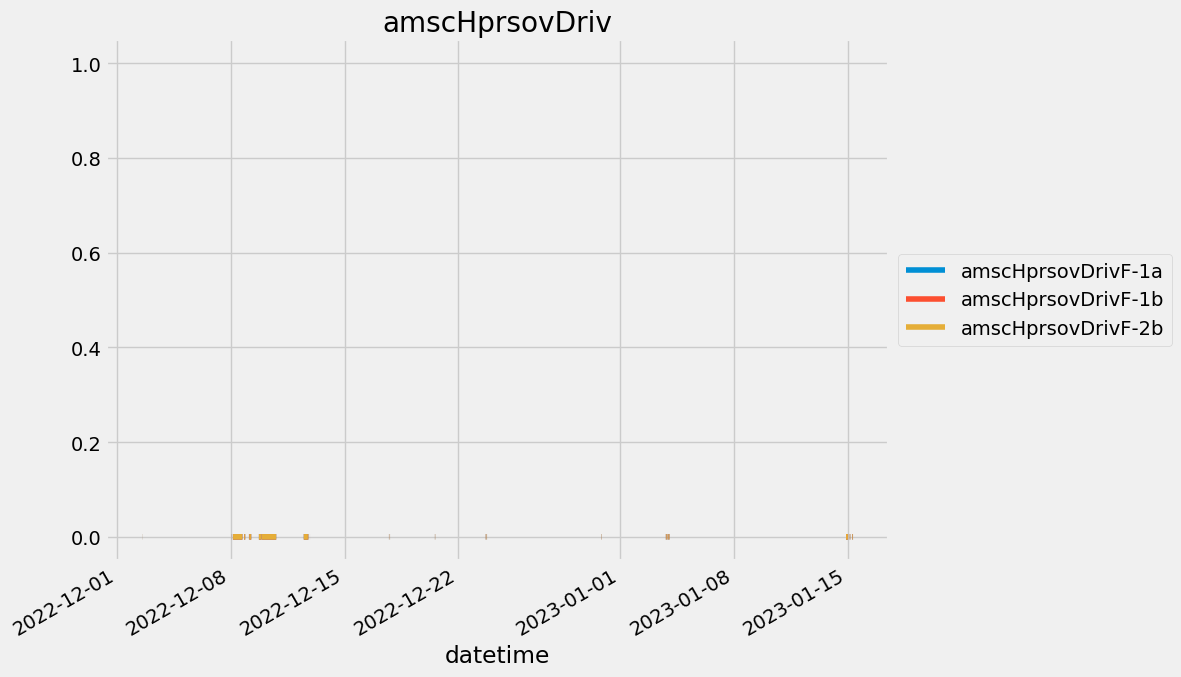

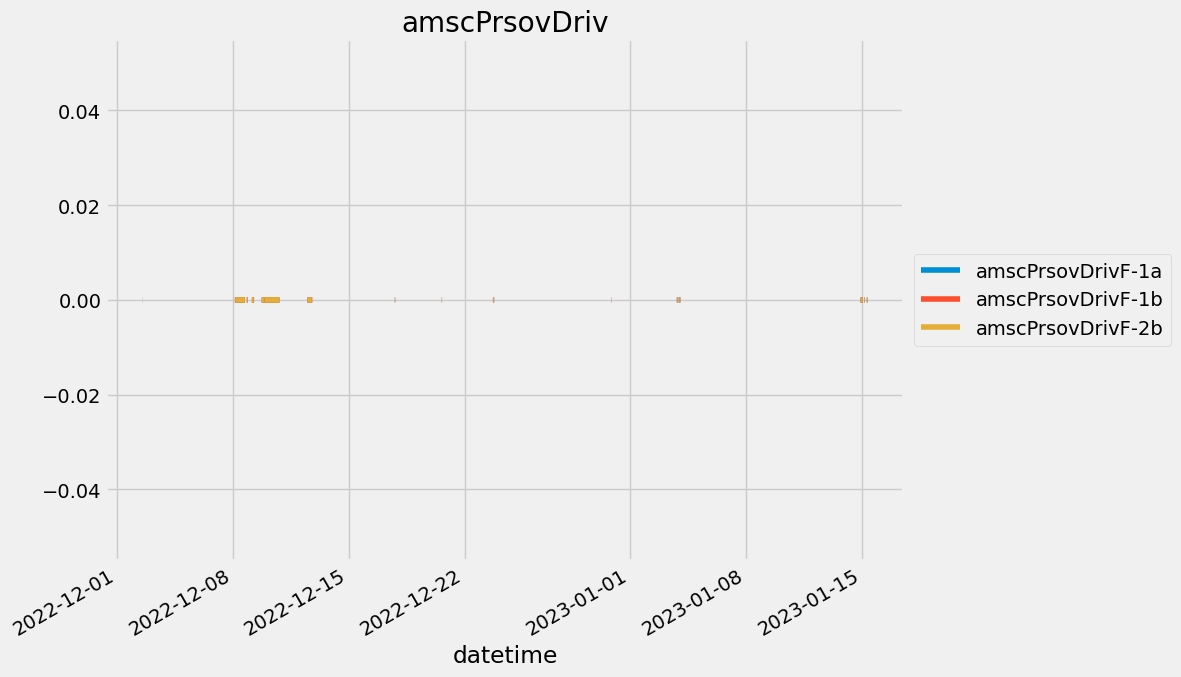

In [145]:
import matplotlib.pyplot as plt

# Substituindo NaNs da coluna datetime pelo próximo valor válido
analysis_df['datetime'].fillna(method='bfill', inplace=True)

# Torna a coluna datetime é o índice
analysis_df.set_index('datetime', inplace=True)

# Lista de grupos a serem plotados
group_names = ['amscHprsovDriv', 'amscPrsovDriv']

for group_name in group_names:
    columns = grouped_columns[group_name]

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plotando cada coluna do grupo
    for column in columns:
        if column in analysis_df.columns: # Verifique se a coluna está no DataFrame
            analysis_df[column].plot(ax=ax, label=column)

    # Definindo título e ajustando o gráfico
    ax.set_title(group_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"{group_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

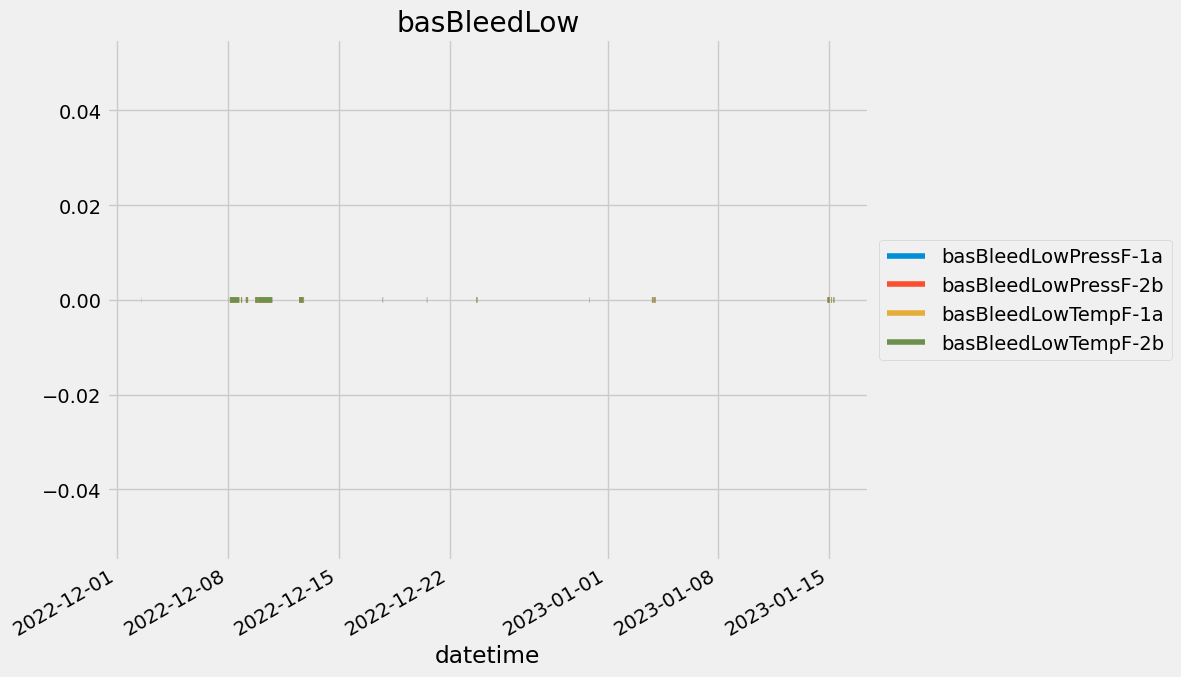

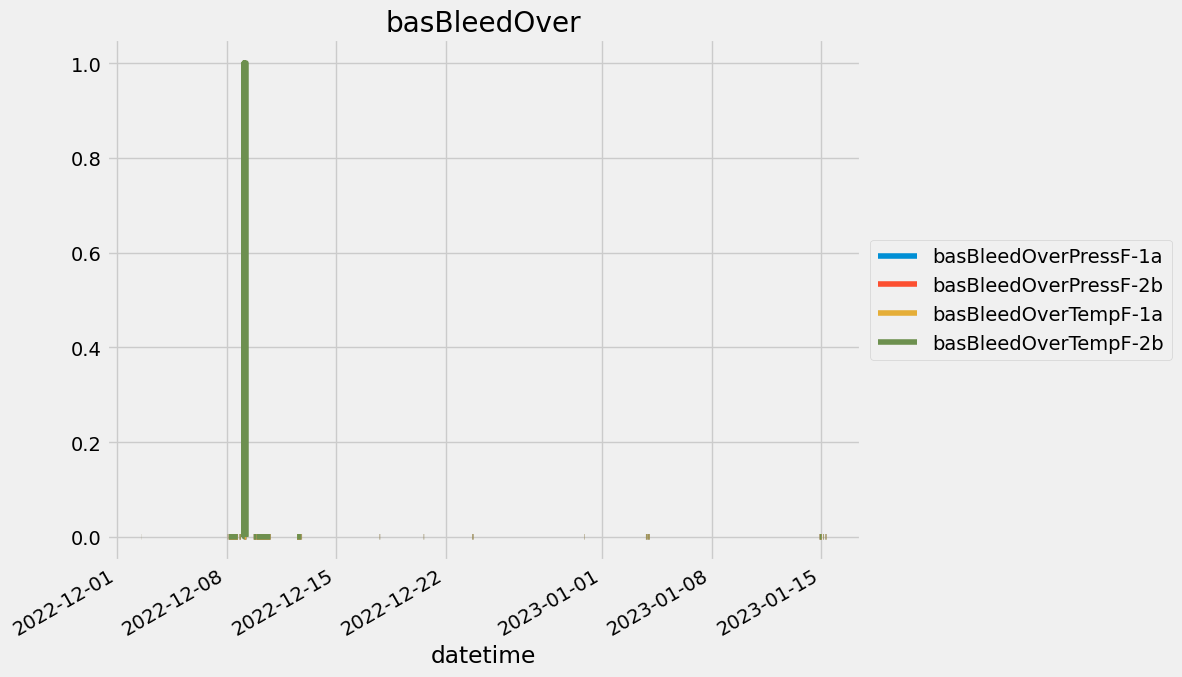

In [146]:
# Lista de grupos a serem plotados
group_names = ['basBleedLow', 'basBleedOver']

for group_name in group_names:
    columns = grouped_columns[group_name]

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plotando cada coluna do grupo
    for column in columns:
        if column in analysis_df.columns: # Verifique se a coluna está no DataFrame
            analysis_df[column].plot(ax=ax, label=column)

    # Definindo título e ajustando o gráfico
    ax.set_title(group_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"{group_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

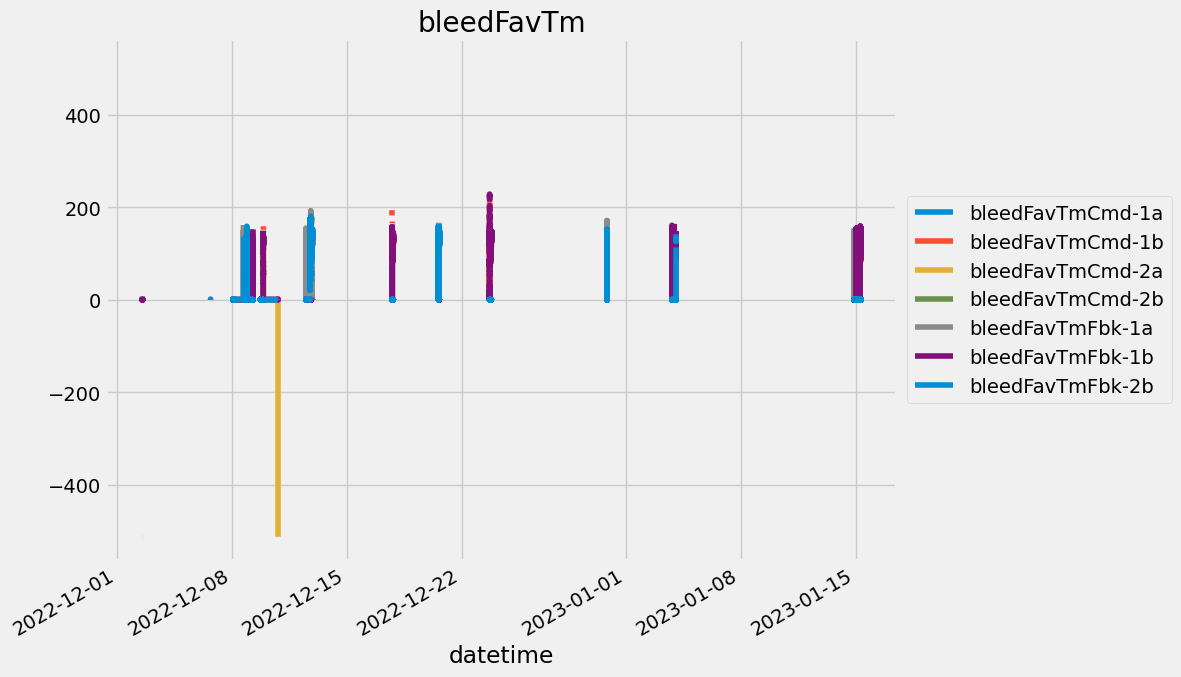

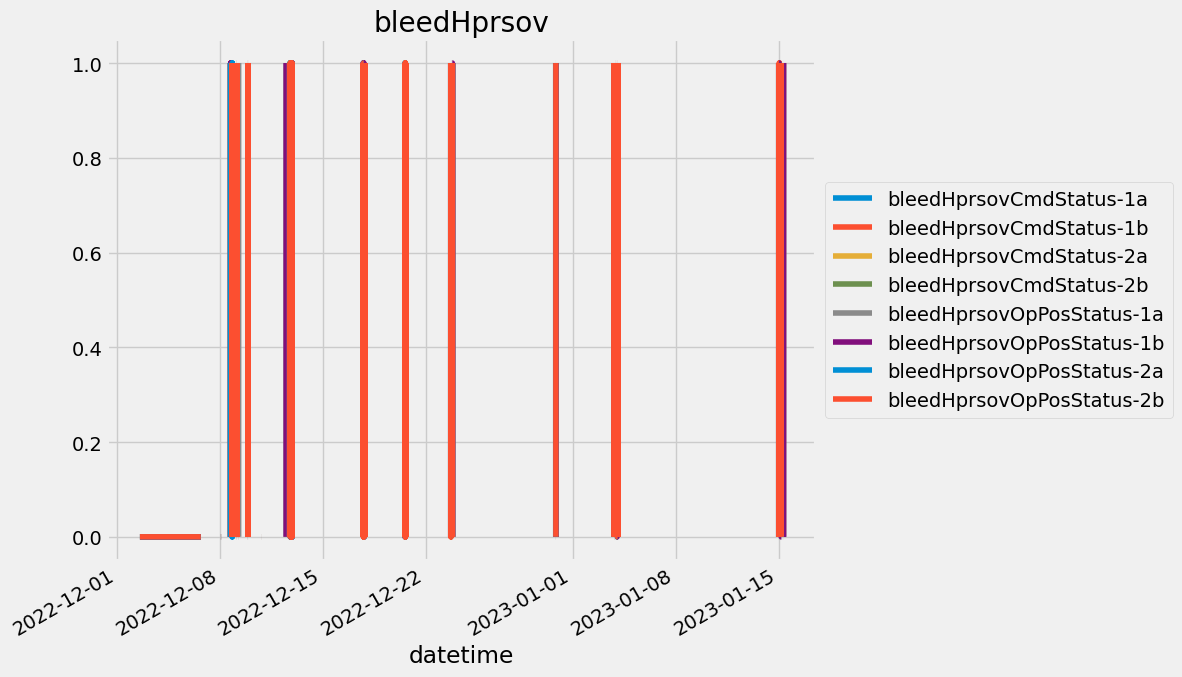

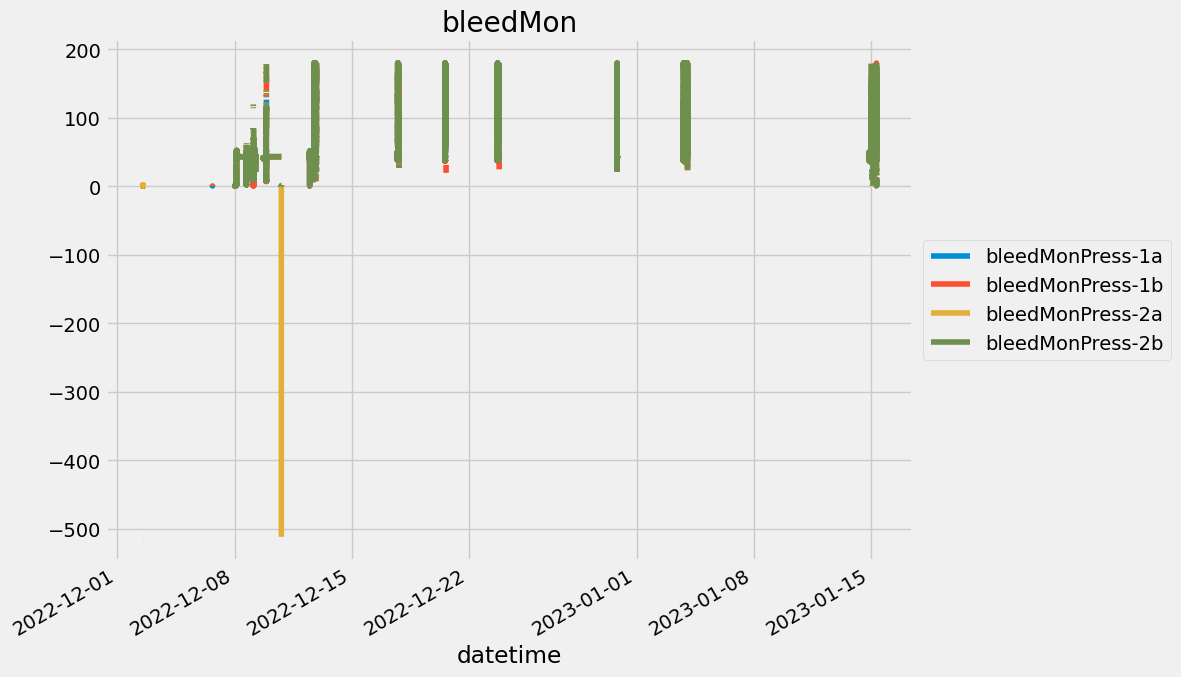

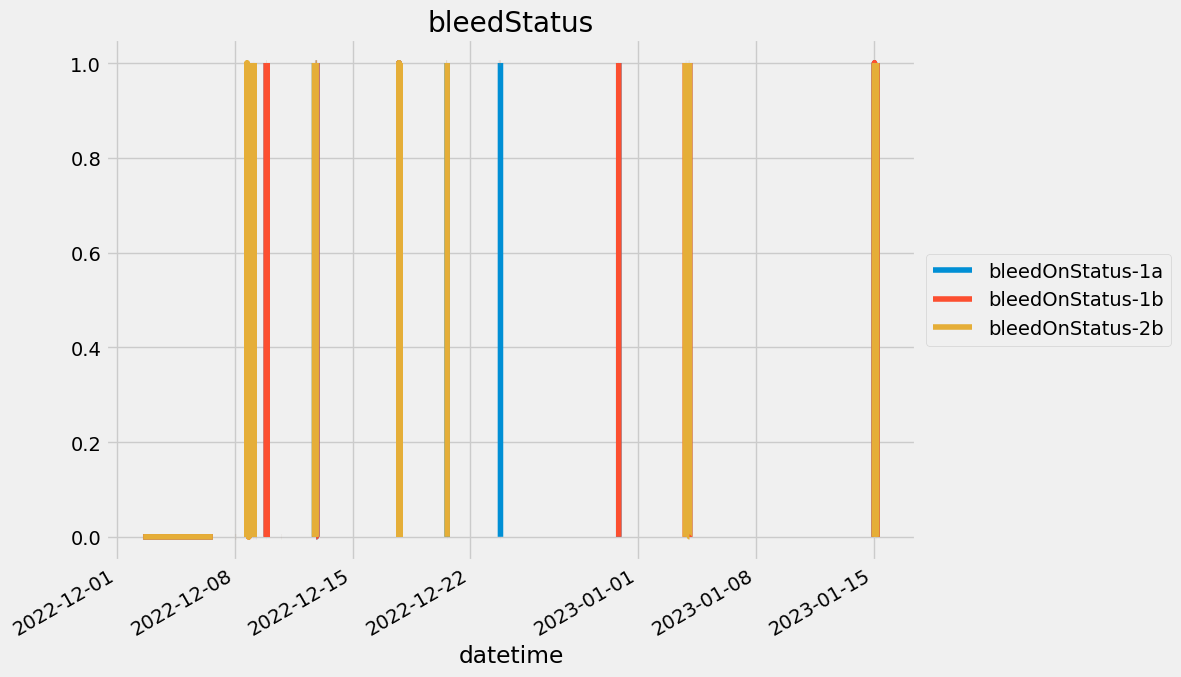

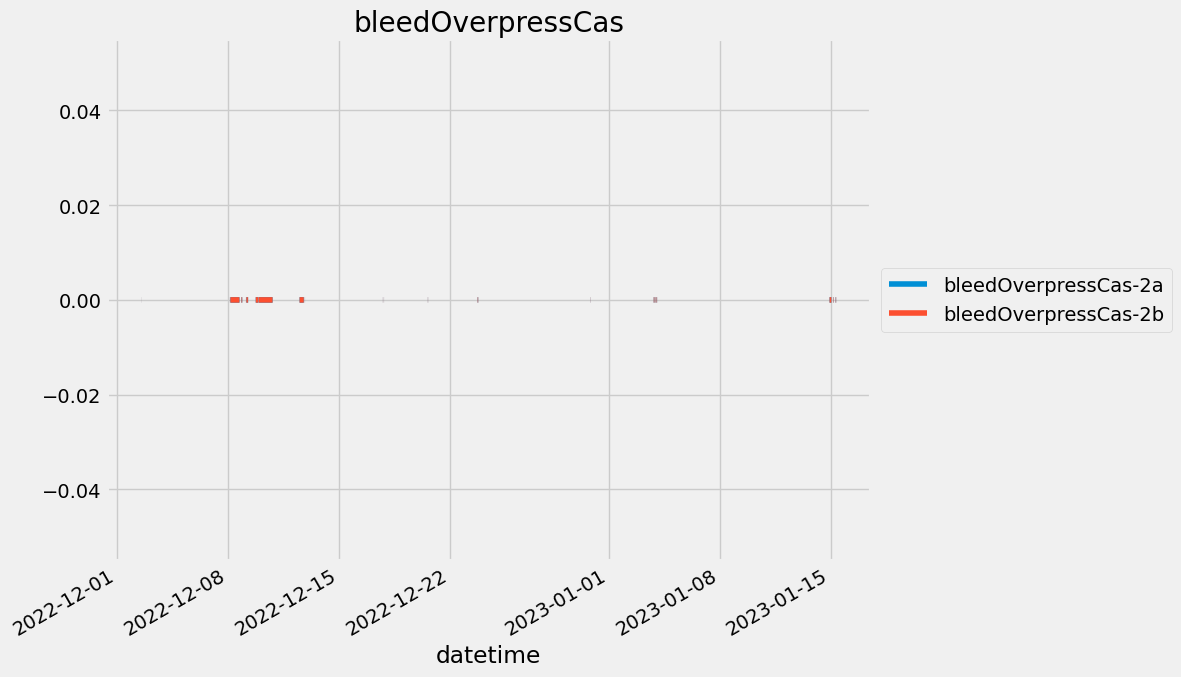

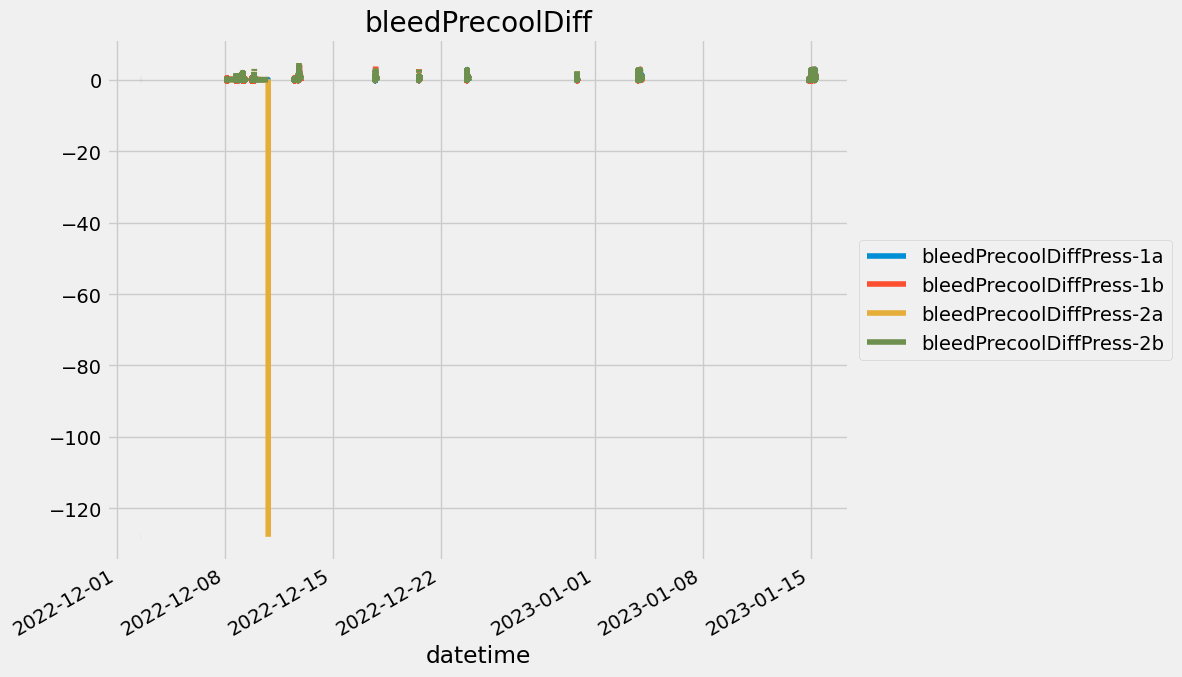

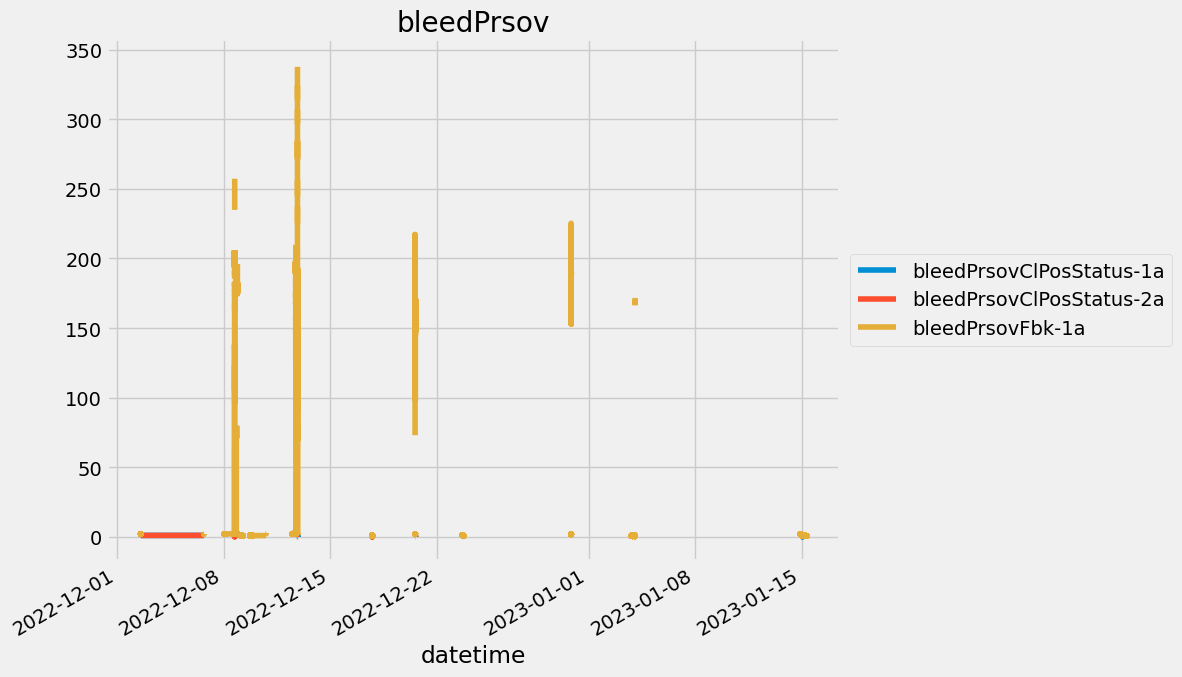

In [147]:
# Lista de grupos a serem plotados
group_names = [
    'bleedFavTm', 'bleedHprsov', 'bleedMon', 'bleedStatus', 
    'bleedOverpressCas', 'bleedPrecoolDiff', 'bleedPrsov'
]

for group_name in group_names:
    columns = grouped_columns[group_name]

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plotando cada coluna do grupo
    for column in columns:
        if column in analysis_df.columns: # Verifique se a coluna está no DataFrame
            analysis_df[column].plot(ax=ax, label=column)

    # Definindo título e ajustando o gráfico
    ax.set_title(group_name)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"{group_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

In [130]:
#Remoção de colunas sem variação

# Lista das colunas dos sensores
columns = [  'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
       'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
       'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
       'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
       'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a',
       'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b',
       'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b',
       'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b',
       'bleedHprsovCmdStatus-2a', 'bleedHprsovCmdStatus-2b',
       'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b',
       'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b',
       'bleedMonPress-1a', 'bleedMonPress-1b', 'bleedMonPress-2a',
       'bleedMonPress-2b', 'bleedOnStatus-1a', 'bleedOnStatus-1b',
       'bleedOnStatus-2b', 'bleedOverpressCas-2a', 'bleedOverpressCas-2b',
       'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b',
       'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b',
       'bleedPrsovClPosStatus-1a', 'bleedPrsovClPosStatus-2a',
       'bleedPrsovFbk-1a'
]

# Identifique as colunas sem variação
columns_to_drop = [col for col in columns if analysis_df[col].std() == 0]

# Remova essas colunas do dataframe
filtered_df_analysis = analysis_df.drop(columns=columns_to_drop)

print(f"Colunas removidas: {columns_to_drop}")

Colunas removidas: ['amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b', 'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b', 'basBleedOverTempF-1a', 'bleedOverpressCas-2a', 'bleedOverpressCas-2b']


In [135]:
filtered_df_analysis.columns

Index(['recording_time', 'phaseOfFlight-1', 'message0418DAA-1',
       'message0422DAA-1', 'amscHprsovDrivF-2b', 'basBleedOverTempF-2b',
       'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
       'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
       'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
       'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
       'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedPrecoolDiffPress-1a',
       'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a',
       'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a',
       'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a', 'datetime'],
      dtype='object')

### Matriz de correlação para o conjunto de dados final

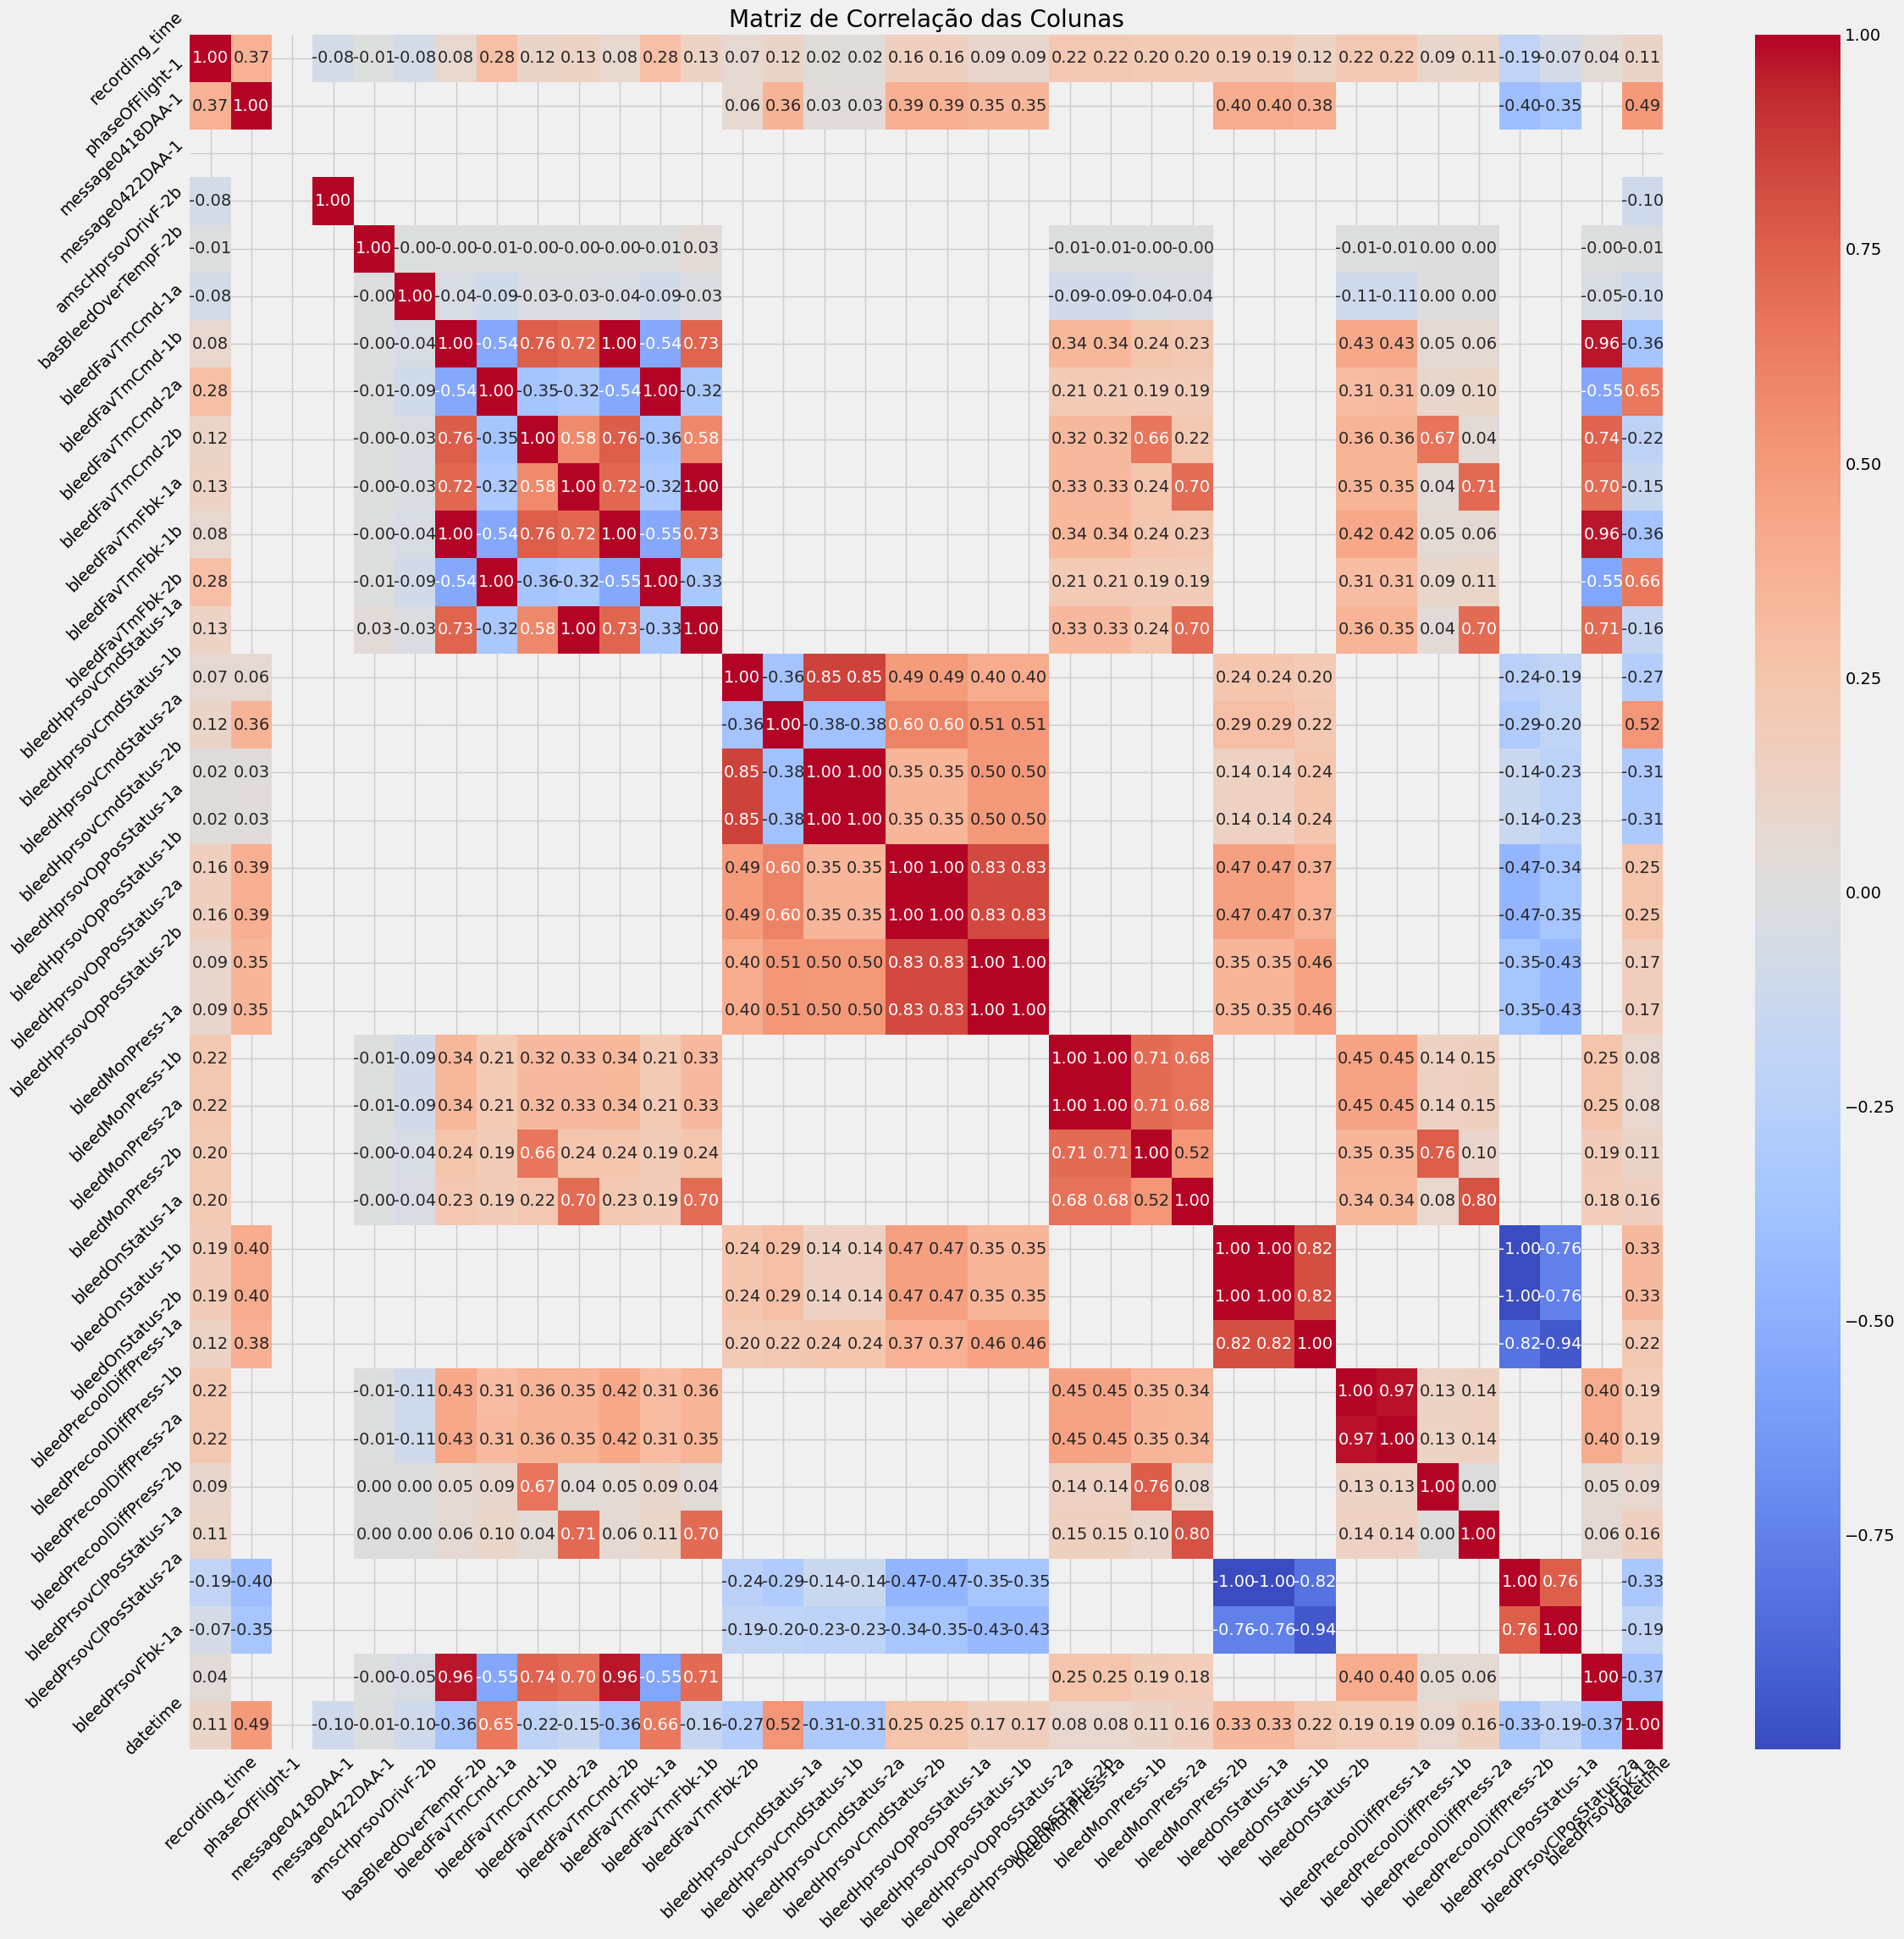

In [148]:
selected_columns = ['recording_time', 'phaseOfFlight-1', 'message0418DAA-1',
       'message0422DAA-1', 'amscHprsovDrivF-2b', 'basBleedOverTempF-2b',
       'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
       'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
       'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
       'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
       'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedPrecoolDiffPress-1a',
       'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a',
       'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a',
       'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a', 'datetime'
]

# Ajustando a visualização para essas colunas
plt.figure(figsize=(25, 25))
corr_matrix_selected = filtered_df_analysis[selected_columns].corr()
sn.heatmap(corr_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlação das Colunas")
plt.savefig("correlation_matrix_depois.png", dpi=300, bbox_inches='tight')
plt.show()

### Box plot  para o conjunto de dados final

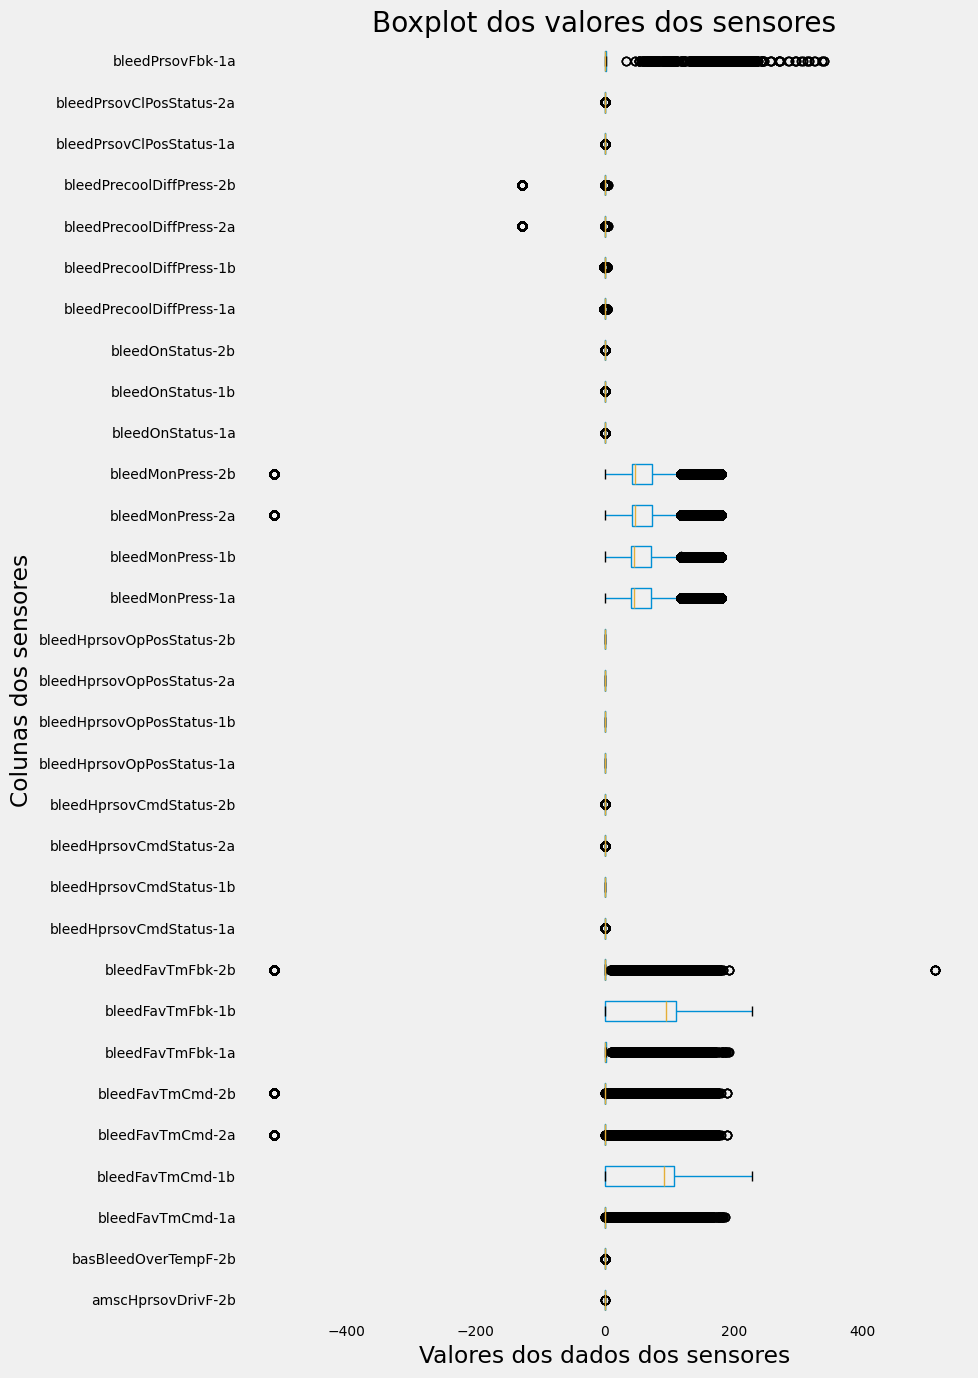

In [150]:
# Lista das colunas dos sensores
sensor_columns = [
'amscHprsovDrivF-2b', 'basBleedOverTempF-2b',
       'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
       'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
       'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
       'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
       'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
       'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
       'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
       'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
       'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedPrecoolDiffPress-1a',
       'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a',
       'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a',
       'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]

# Criar o boxplot para as colunas de sensores
ax1 = filtered_df_analysis[sensor_columns].boxplot(grid=False, vert=False, fontsize=10, figsize=(10,14))

# Configurar os rótulos e o título
ax1.set_xlabel('Valores dos dados dos sensores')
ax1.set_ylabel('Colunas dos sensores')
ax1.set_title('Boxplot dos valores dos sensores')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig("boxplot_sensores_apos.png", dpi=300, bbox_inches='tight')
plt.show()